In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [36]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev, num_reps
).round(3)

In [37]:
pct_to_target[0:5]

array([1.142, 0.831, 0.978, 1.039, 0.679])

In [39]:
#another example of target sales distribution
sales_target_values= [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3,.3,.2,.1,.05,.05]
sales_target = np.random.choice(sales_target_values,num_reps, 
                    p=sales_target_prob) 



In [40]:
sales_target[0:14]

array([200000, 300000, 100000,  75000, 100000,  75000, 300000, 200000,
        75000,  75000, 100000, 500000, 300000, 100000])

In [44]:
df = pd.DataFrame(index=range(num_reps), 
                 data={'PCT_to_Target': pct_to_target,
                       'Sales_Target': sales_target})

df['Sales'] = df['PCT_to_Target'] * df['Sales_Target']





In [45]:
df.head()

,PCT_to_Target,Sales_Target,Sales
0,1.142,200000,228400.0
1,0.831,300000,249300.0
2,0.978,100000,97800.0
3,1.039,75000,77925.0
4,0.679,100000,67900.0


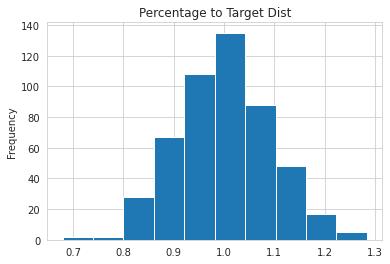

In [47]:
df['PCT_to_Target'].plot(kind='hist',title='Percentage to Target Dist')

In [48]:
def calc_commission_rate(x):
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [51]:
df['Commission_Rate'] = df['PCT_to_Target'].apply(calc_commission_rate)

In [52]:
df.head()

,PCT_to_Target,Sales_Target,Sales,Commission_Rate
0,1.142,200000,228400.0,0.04
1,0.831,300000,249300.0,0.02
2,0.978,100000,97800.0,0.03
3,1.039,75000,77925.0,0.04
4,0.679,100000,67900.0,0.02


In [53]:
df['Commission_Ammount'] = df['Commission_Rate'] * df['Sales']

In [54]:
df.head()

,PCT_to_Target,Sales_Target,Sales,Commission_Rate,Commission_Ammount
0,1.142,200000,228400.0,0.04,9136.0
1,0.831,300000,249300.0,0.02,4986.0
2,0.978,100000,97800.0,0.03,2934.0
3,1.039,75000,77925.0,0.04,3117.0
4,0.679,100000,67900.0,0.02,1358.0


In [55]:
df.describe()

,PCT_to_Target,Sales_Target,Sales,Commission_Rate,Commission_Ammount
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,1.001252,163600.000000,164025.45000,0.034140,5692.794500
std,0.093723,116155.172283,119027.87708,0.007153,4521.312296
min,0.679000,75000.000000,60375.00000,0.020000,1207.500000
25%,0.940000,75000.000000,81387.50000,0.030000,2927.250000
50%,1.001000,100000.000000,102450.00000,0.040000,4018.000000
75%,1.064250,200000.000000,207800.00000,0.040000,8150.000000
max,1.284000,500000.000000,596000.00000,0.040000,23840.000000


In [56]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

 # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [57]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [58]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,801,532.0","2,860,346.0","83,814,975.0"
std,"2,740,056.0","103,177.0","2,701,900.0"
min,"75,107,250.0","2,552,865.0","75,125,000.0"
25%,"81,936,375.0","2,792,831.0","81,975,000.0"
50%,"83,783,625.0","2,857,080.0","83,850,000.0"
75%,"85,706,938.0","2,931,058.0","85,775,000.0"
max,"92,275,500.0","3,166,905.0","93,100,000.0"


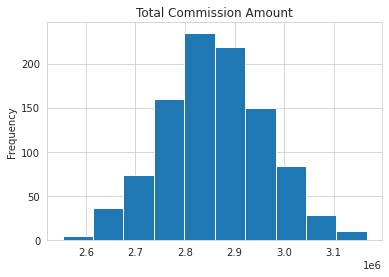

In [59]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

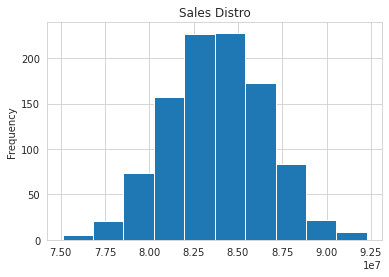

In [61]:
results_df['Sales'].plot(kind='hist', title='Sales Distro')